# **Finding minimal d-separators in linear time and applications**

In this Colab we are going to study the paper "Finding minimal d-separators in linear time and applications" by Benito van der Zander and Maciej Liskiewicz.
We are going to first give a theoric introduction to the topic, then we are going to implement the algorithm and finally we will see the results of some tests. The main questions that we want to answer are:

- How to check if a given set $𝐙$ is a minimal d-separator between two sets $𝐗$ and $𝐘$
- Given two sets $𝐗$ and $𝐘$, find the set $𝐙$ that is a minimal d-separator of them

# **Introduction**

We are going to consider DAGs (Directed Acyclic Graph): G = ($𝐕$, $𝐄$) with n = |$𝐕$| number of nodes, and m = |$𝐄$| number of edges. Before going through the algorithms we are going to give some definitions and explain some concepts that are important later.

It is known that if I want to find a d-separating set between two nodes $𝐗$ and $𝐘$, the set of all the ancestors of these two nodes (exept themself) is such a separator. The problem arises when I add the constraint that this set must be minimal. In this case, this problem can be solved by computing the moral graph of the subgraph of G induced by the ancestors of $𝐗$ and $𝐘$, and then reduce the original problem to finding the minimal vertex separators in undirected graphs. The cost of this algorithm is O($m_a$), where $m_a$ is the number of edges in the moral graph that unfortunatly can reach, in some cases, $m^2$. The point of this study is to give an algorithm that doesn't calculate any moral graph and solve the problem in a linear time in respect to the number of edges in $G_{An(X U Y)}$.

We are going to consider $𝐗$ and $𝐘$ like two disjoint subsets of $𝐕$ and $𝐙$ is going to be minimal as well as imposing the constraint $𝐈$ ⊆ $𝐙$, where $𝐈$ is a set of nodes that we want to include in the d-separating set ($𝐈$ can also be empty).

## Definitions
Let's report some definitions presented in the paper that are essential to understand the algorithm.

- A node C on a walk π is a **collider** if both the preceding and succeeding edge on the walk have an arrowhead at C, like: → C ← (note that the same node can be a collider in a path and not in another one)

- An internal node V on π is called **almost definite non-collider** if it occurs as A ← V or V → B or as A - V - B, where A and B are the nodes preceding/succeeding V on π. It is called a **definite non collider** in the first two cases or if A and B are not adjacent (*Chains* and *Forks* that we studied during the course are in this category)

- An internal vertex on π is said to be of **definite status** if it is a collider or a definite non collider on π. A path is said to be of definite status if all its internal vertices are of definite status.

- A walk π in G is **active** given **Z** if every definite non-collider is not in **Z** and every collider is in An(**Z**).

- A set **Z** *d-separates* two sets **X** and **Y** if and only if there exists no definite status walk between any X ∈ **X** and Y ∈ **Y** that is active given Z.

## Minimal separators in DAGs

Here we find a first way to implement an algotithm that test and find a minimal d-separating set in a DAG without computing any moral graph. For this purpose, we have to give some more definitions; let's call $𝐀 = An(𝐗 ∪ 𝐘 ∪ 𝐈)$:

- We define $𝐗^*$, the *closure* of $𝐗$, to be the set of all nodes *V* for wich there exists a path from $𝐗$ to *V* that only contains nodes of $𝐀$ and no non-collider in $𝐙$; so, we are saying that if a node V is in $𝐗^*$, then there exist a path from $𝐗$ to V that only contains nodes in $𝐀$ and if one of this nodes is in $𝐙$ then it is also a collider. So, we can say $𝐗^*$ represents all the nodes that are *reachable* from $𝐗$

- Given that, we can say that a set $𝐙$ is a minimal d-separator, under the constraint $𝐈 ⊆ 𝐙 ⊆ 𝐑$, if and only if:
  - $𝐗^* ∩ 𝐘 = ∅$, and
  - $𝐈 ⊆ 𝐙 ⊆ 𝐀 ∩ 𝐑$, and
  - $𝐙$ \ $𝐈$ is a subset of $𝐗^* ∩ 𝐘^*$

N.B.: $𝐑$ is a set of variables described as follow in the paper: the set $𝐕$ \ $𝐑$ is a set of unobserved variables. So $𝐑$ is the set of variables that are observable.

So if a set of nodes $𝐙$ satisfies these conditions (we are going to refer them later as **minimality criterion**), then it is a minimal d-separator for $𝐗$ and $𝐘$.


The first condition says that the set is a separator since it blocks all paths between $𝐗$ and $𝐘$; the second condition is a contraint that allows us to forces $𝐙$ to enclude a set of node $𝐈$ and no other nodes outside $𝐀 ∩ 𝐑$; the third condition gives us minimality: for each node $Z ∈ 𝐙$ \ $𝐈$ there exists a path $𝐗^*$ to $Z$ and a path from $𝐘^*$ to $Z$, means that if we remove this node, we would connect those paths turning $𝐙$ into a non separator.

Since the sets $𝐗^*$ and $𝐘^*$ can be easily found in time $O(n + m)$ with the Bayes-Ball algorithm, the minimality criterion can be testet in linear time.

This is not the only result that we can achieve from this section, since it is also possibile to find a minimal separator in DAG in linear time: the main idea is to choose a set like $𝐙 = (𝐀 ∩ 𝐑 ∩ 𝐗^* ∩ 𝐘^*) ∪ 𝐈$, which automatically fulfills the minimality criterion (it is a subset ok $𝐗^* ∩ 𝐘^*$ restricted to nodes of $𝐀 ∩ 𝐑$ with the addition of $𝐈$). The main problem is that to calculate this separator, we need the sets $𝐗^*$ and $𝐘^*$, that need $𝐙$ to be calculated. So the idea proposed is to perform the intersections one after another:

- choose an initial separator $𝐙_0 = 𝐑 ∩ (𝐀 ∖ (𝐗 ∪ 𝐘))$: this is surely a separator, if such separator exists
- use it to calculate $𝐗^*$ and then calculate $𝐙_x = 𝐙_0 ∩ 𝐗^* ∪ 𝐈$, so we are removing from $𝐙_0$ all the nodes that are not reachable from $𝐗$
- use $𝐙_x$ to compute $𝐘^*$ and test if $𝐗^*∩𝐘 = ∅$: if it's not true, the function is going to return false since the two sets are not separable even from the initial and more general separator $𝐙_0$.
- Alternatively, the function returns the final separator $𝐙 = 𝐙_x ∩ 𝐘^* ∪ 𝐈$

```
def find_min_sep_in_dag(G, X, Y, I, R):
  A := An(X ∪ Y ∪ I)
  Z0 := R ∩ (A \ (X ∪ Y))
  Calculate X* using separator Z0
  Zx := Z0 ∩ X* ∪ I
  Calculate Y* using separator Zx
  if X* ∩ Y != ∅ then return ⊥
  return Z := Zx ∩ Y* ∪ I

```

The algorithm explained in this part require the implementation of the Bayes-ball algorithms, that is beyond the scope of our study. So, the implementation of the algorithms is in the next section, as a particular case of the general algorithm.

# General Algorithm

I'm going to implement the general algorithm presented in the paper, with a focus on the DAG's case, so I'm going to consider only uni-directed edges.

In [ ]:
import networkx as nx
from typing import Set

import matplotlib.pyplot as plt

Let's start with the implementation of the function "*reachable*", that returns all nodes $W ∈ 𝐕$ that are reachable from a node $X ∈ 𝐗$ by an almost definite status walk on wich all non colliders are not in $𝐙$ and restricted to node in $𝐀$. So this function, for a given set $𝐗$, is calculating the set $𝐗^*$ described above.

**Legend**: for a specific node, 0 is edge in, 1 is edge out.

Explenation of the function:

- The function take as input a graph *G*, and three sets of nodes, $𝐗$, $𝐀$, $𝐙$, where $𝐗$ is the set of interest, $𝐀$ is the set defined as the ancestors of the union of $𝐗$, $𝐘$ and $𝐈$, while $𝐙$ is my conditioning set

- First we create a list *Q* (treaten like a queue) wich contains the nodes yet to be visited

- Then, until the queue *Q* is not empty, we remove the first element of *Q* and save it in *top* (*e* is going to be the edge, while *V* the node)

- Then we loop on all the neighboors of *V*: for each of them, we have to understand what kind of edge it has with node V, and save this information. Note that the edge *f* is relative to *V* (for example, if *N* is in the successors, this means that we have *V* → *N*, and that's why we are saving a 1), so we are also going to save the same edge but from the perspective of *N* in the variable *nf*

- At this point the algorithm evaluate the pass function, that is true when *N* is in $𝐀$ and when *V* is not in $𝐙$ or is a collider. If the pass function returns true and the couple $(nf, N)$ is not already in P, it means that *N* is a reachable node so it is added to *P* and is also added to *Q* so later the algorithm can check his neighbors.

- Finally the procedure returns the list *P* that contains all the nodes reachable from $𝐗$

In [ ]:
def reachable (G: nx.DiGraph, X: Set[str], A: Set[str], Z: Set[str]):
  for x in X:
    Q = [(0, x)]
  P = Q.copy()

  #loop until Q is empty
  while Q:
    top = Q.pop(0)  #removing the first element of Q and assign it to top
    V = top[1]
    e = top[0]

    #calculating the neighboors of V
    predecessors = set(G.predecessors(V))
    successors = set(G.successors(V))
    neighboors = predecessors | successors

    #cycle for all neighboors of V
    for N in neighboors:
      f = 1 if N in successors else 0  #here the edge f is relative to node V
      nf = 1 - f        #here is relative to node N

      # implementation of pass function
      pass_function = (N in A) and (V not in Z or (e == 0 and f == 0))

      if pass_function and ((nf, N) not in P):
        Q.append((nf,N))
        P.append((nf,N))
  return set(p[1] for p in P)



We are ready now to implement the algorithm to test if a given set $𝐙$ respect the minimality criterion described above, and so if it is a minimal separator. We are going to check if the given set respects all the three requests.

Explenation of the code:

- First of all, we need to calcolate **A** as the possible ancestors of ($𝐗 ∪ 𝐘 ∪ 𝐈$), but since we are working with DAG we can search only for the ancestors since there are no undirected edges in the graph (note that we are working with the definition that every node is ancestor of himself)

- The funcion is going to return *False* if:
  - $𝐈$ is not a subset of $𝐙$ or $𝐙$ is not a subset of $𝐑$ (second request)
  - $𝐙$ is not a subset of $𝐀$ (second request)
  - The intersection between $𝐗^*$ and $𝐘$ is not empty (first request)
  - the set $𝐙 \ 𝐈$ is not a subset of $𝐗^* ∩ 𝐘^*$ (third request)

In [ ]:
def ancestors (G: nx.DiGraph, X: Set[str]):
  A = X

  for x in X:
    A = A | (nx.ancestors(G, x))

  return A

In [ ]:
def test_min_sep (G: nx.DiGraph, X: Set[str], Y: Set[str], Z: Set[str], I: Set[str], R: Set[str]):

  if not(I <= Z) or not(Z <= R):
    return False

  A = ancestors(G, X | Y | I)

  if not(Z <= A):
    return False

  X_star = reachable(G, X, A, Z)

  if X_star & Y != set():
    return False

  if not(Z - I <= X_star):
    return False

  Y_star = reachable(G, Y , A, Z)

  if not(Z- I <= Y_star):
    return False

  return True

Finally, we can implement the algotithms that find a minimal separator between the sets of nodes $𝐗$ and $𝐘$.

The first step is to implement the function *find_nearest_sep* that find a separator between $𝐗$ and $𝐘$ that is closer to $𝐗$ than to $𝐘$: we compute an initial separator $𝐙_0$ that contains all the observable nodes in $𝐀$ except from $𝐗 ∪ 𝐘$ and so it blocks as many path as possible between these two sets of nodes. This set is used to calculate $𝐗^*$ and then, if the intersection between $𝐗^*$ and $𝐘$ is empty, we remove from the separator all the nodes that are not reachable from $𝐗$ and return it as the result.

The function *find_min_sep* consists of calling the *find_nearest_sep* function both for $𝐗$ and $𝐘$ and, if any of the two calls return *False*, it returns the intersection of the two sets, since it contains all the nodes reachable from both $𝐗$ and $𝐘$ and so they are needed in $𝐙$ to block all the paths

In [ ]:
def find_nearest_sep(G: nx.DiGraph, X: Set[str], Y: Set[str], I: Set[str], R: Set[str]):
  A = ancestors(G, X | Y | I)
  Z0 = R & (A - (X | Y))
  X_star = reachable(G, X, A, Z0)
  if X_star & Y != set():
    return False
  return Z0 & X_star | I

In [ ]:
def find_min_sep(G: nx.DiGraph, X: Set[str], Y: Set[str], I: Set[str], R: Set[str]):
  Zx = find_nearest_sep(G, X, Y, I, R)
  Zy = find_nearest_sep(G, Y, X, I, Zx)

  if (Zx==False) or (Zy==False):
    return False
  return Zx & Zy | I


## Testing

Let's now test our code on the graphs provided in the paper

In [ ]:
G1 = nx.DiGraph([('X', 'V2'), ('V1', 'X'), ('V1', 'V2'), ('V2', 'V3'), ('V3', 'Y')])
G2 = nx.DiGraph([('V1', 'X'), ('V1', 'V2'), ('U', 'X'), ('U', 'V2'), ('V2', 'Y'), ('V3', 'V2'), ('V3', 'Y')])

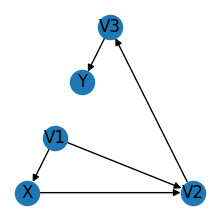

In [ ]:
fig = plt.figure(1, figsize=(2, 2))
nx.draw_planar(G1, with_labels=True)

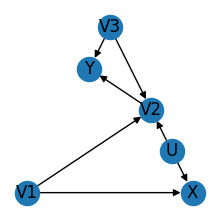

In [ ]:
fig = plt.figure(1, figsize=(2, 2))
nx.draw_planar(G2, with_labels=True)

Let's start to test the reachable function:

In [ ]:
print(f'Nodes reachable from X given Z = {{}} : ', reachable(G1, {'X'}, ancestors(G1, set({'X', 'Y'})), set({}) ))
print(f'Nodes reachable from X given Z = {{V1}} : ', reachable(G1, {'X'}, ancestors(G1, set({'X', 'Y'})), set({'V1'}) ))
print(f'Nodes reachable from X given Z = {{V2}} : ', reachable(G1, {'X'}, ancestors(G1, set({'X', 'Y'})), set({'V2'}) ))
print(f'Nodes reachable from X given Z = {{V1, V2}} : ', reachable(G1, {'X'}, ancestors(G1, set({'X', 'Y'})), set({'V1', 'V2'}) ))
print()
print(f'Nodes reachable from Y given Z = {{V3}} : ', reachable(G1, {'Y'}, ancestors(G1, set({'X', 'Y'})), set({'V3'}) ))
print(f'Nodes reachable from Y given Z = {{V2}} : ', reachable(G1, {'Y'}, ancestors(G1, set({'X', 'Y'})), set({'V2'}) ))
print(f'Nodes reachable from Y given Z = {{V1}} : ', reachable(G1, {'Y'}, ancestors(G1, set({'X', 'Y'})), set({'V1'}) ))

Nodes reachable from X given Z = {} :  {'V3', 'X', 'V1', 'Y', 'V2'}
Nodes reachable from X given Z = {V1} :  {'V3', 'X', 'V1', 'Y', 'V2'}
Nodes reachable from X given Z = {V2} :  {'V2', 'V1', 'X'}
Nodes reachable from X given Z = {V1, V2} :  {'V2', 'V1', 'X'}

Nodes reachable from Y given Z = {V3} :  {'V3', 'Y'}
Nodes reachable from Y given Z = {V2} :  {'V2', 'V3', 'Y'}
Nodes reachable from Y given Z = {V1} :  {'V3', 'X', 'V1', 'Y', 'V2'}


In [ ]:
print(f'Nodes reachable from X given Z = {{V1}} : ', reachable(G2, {'X'}, ancestors(G2, set({'X', 'Y'})), set({'V1'}) ))
print(f'Nodes reachable from X given Z = {{V1, V2, V3}} : ', reachable(G2, {'X'}, ancestors(G2, set({'X', 'Y'})), set({'V1', 'V2', 'V3'}) ))

print()

print(f'Nodes reachable from Y given Z = {{V3}} : ', reachable(G2, {'Y'}, ancestors(G2, set({'X', 'Y'})), set({'V3'}) ))
print(f'Nodes reachable from Y given Z = {{V1, V2, V3}} : ', reachable(G2, {'Y'}, ancestors(G2, set({'X', 'Y'})), set({'V1', 'V2', 'V3'}) ))
print(f'Nodes reachable from Y given Z = {{V1}} : ', reachable(G2, {'Y'}, ancestors(G2, set({'X', 'Y'})), set({'V1'}) ))

Nodes reachable from X given Z = {V1} :  {'V3', 'X', 'V1', 'Y', 'V2', 'U'}
Nodes reachable from X given Z = {V1, V2, V3} :  {'V3', 'X', 'V1', 'V2', 'U'}

Nodes reachable from Y given Z = {V3} :  {'V3', 'X', 'V1', 'Y', 'V2', 'U'}
Nodes reachable from Y given Z = {V1, V2, V3} :  {'V2', 'V3', 'Y'}
Nodes reachable from Y given Z = {V1} :  {'V3', 'X', 'V1', 'Y', 'V2', 'U'}


All the results are correct. Let's now test the function *test_min_sep* to see if it can find the minimal separators. As provided in the paper, the set $𝐙$ = {V$_3$} and $𝐙$ = {V$_2$} are both minimal separators for the graph G1, while $𝐙$ = {V$_2$, V$_3$} is not:

In [ ]:
test_min_sep(G1, {'X'}, {'Y'}, {'V3'}, set(), set(G1.nodes))

True

In [ ]:
test_min_sep(G1, {'X'}, {'Y'}, {'V2'}, set(), set(G1.nodes))

True

In [ ]:
test_min_sep(G1, {'X'}, {'Y'}, {'V2', 'V3'}, set(), set(G1.nodes))

False

For the second graph, $𝐙$ = {V$_2$, V$_3$} is a minimal set, while $𝐙$ = {V$_1$, V$_2$, V$_3$} is not:

In [ ]:
test_min_sep(G2, {'X'}, {'Y'}, {'V2', 'V3'}, set(), set(G2.nodes))

True

In [ ]:
test_min_sep(G2, {'X'}, {'Y'}, {'V1', 'V2', 'V3'}, set(), set(G2.nodes))

False

Finally, let's test the funcion *find_min_sep* on both the graphs:

In [ ]:
find_min_sep(G1, {'X'}, {'Y'}, set(), set(G1.nodes))


{'V2'}

For the second graph, we have to remove *U* from the nodes of the graph that we can condition on, since it represents an unobservable variables

In [ ]:
nodes_g2 = set(G2.nodes)

nodes_g2.remove('U')

In [ ]:
find_min_sep(G2, {'X'}, {'Y'}, set(), nodes_g2)

{'V2', 'V3'}

All the results obtained in this work are correct